In [1]:
!kaggle competitions list -s plant

ref                             deadline             category    reward  teamCount  userHasEntered  
------------------------------  -------------------  ----------  ------  ---------  --------------  
plant-seedlings-classification  2018-03-12 23:59:00  Playground   Kudos        836            True  


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
#Prepare dataset props
competition_name='plant-seedlings-classification' # this is the kaggle dataset name
dest_folder_name='plant-seedlings' # sub folder of fast.ai data folder

In [5]:
#Prepare params
from fastai.datasets import datapath4file

path = datapath4file(f'{(dest_folder_name)}')
dest_folder = path.as_posix()
print(dest_folder)

/home/jupyter/.fastai/data/plant-seedlings


In [6]:
# !kaggle competitions download -c {competition_name} -p {dest_folder}

In [7]:
# !ls -l {dest_folder}

In [8]:
#Unzip
# !unzip -o -q {dest_folder}/train.zip -d {dest_folder}
# !unzip -o -q {dest_folder}/test.zip -d {dest_folder}

In [9]:
# !ls -l {dest_folder}

In [38]:
# define path 
path_train = path/"train"
path_train
path_test = path/"test"
path_test

PosixPath('/home/jupyter/.fastai/data/plant-seedlings/test')

In [45]:
len(path_test.ls())

794

In [55]:
data = (ImageItemList.from_folder(path_train)    # where to find the data
        .random_split_by_pct()             # splitting the data by percentage. train = 0.8, valid = 0.2
        .label_from_folder()               # how to label? by folder
#         .add_test_folder(path_test)                 # is there test folder? default = 'test'
        .transform(get_transforms(), size=128)    # transform the data
        .databunch()
        .normalize(imagenet_stats))

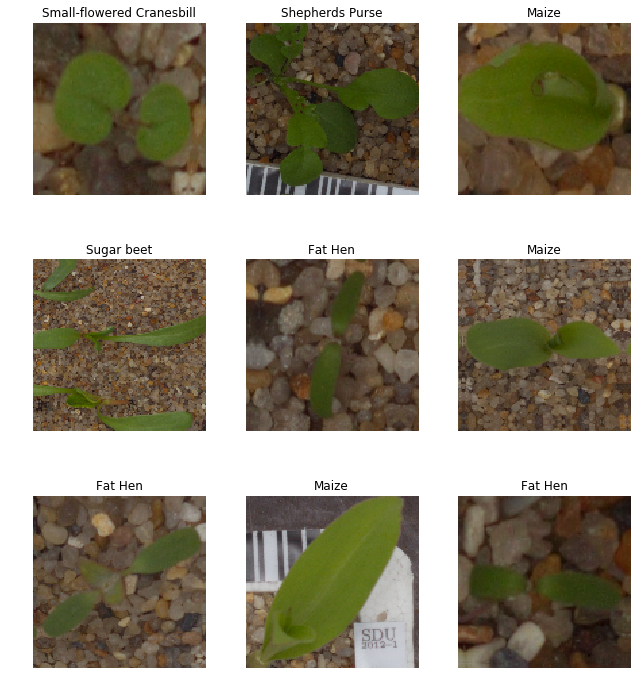

In [56]:
data.show_batch(rows=3)

In [57]:
data.test_ds.y

AttributeError: 'NoneType' object has no attribute 'y'

In [50]:
# f_score = partial(fbeta, thresh=0.2)

In [58]:
learn = create_cnn(data, models.resnet50, metrics=[accuracy, error_rate])

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


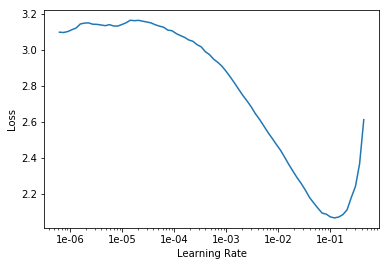

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(5)

Total time: 01:29
epoch  train_loss  valid_loss  accuracy  error_rate
1      1.550928    0.792273    0.737895  0.262105    (00:17)
2      0.885991    0.439159    0.852632  0.147368    (00:18)
3      0.567335    0.344498    0.887368  0.112632    (00:17)
4      0.391499    0.295823    0.910526  0.089474    (00:17)
5      0.313565    0.290836    0.909474  0.090526    (00:17)

